# Oregon GDP PER CAPITA

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
or_df = pd.read_csv("../state_gdp/oregon_gdp_cleaned.csv")
# or_df

In [4]:
or_df = or_df.iloc[19:]
# or_df

In [5]:
or_df = pd.DataFrame(or_df)

## Converting from millions to ones

In [6]:
or_df.rename(columns={"dollars (millions)": "gdp"}, inplace=True)

In [7]:
gdp = or_df["gdp"].tolist()

In [8]:
def actual_total():
    gdp_total = []
    value = 0
    count = 1 
    while count <= 6:
        total = gdp[value]*1000000
        gdp_total.append(total)
        value += 1
        count += 1
    return gdp_total

In [9]:
act_gdp = actual_total()

In [10]:
data = {"year": [2016, 2017, 2018, 2019, 2020, 2021],
       "gdp": act_gdp}
or_gdp_year = pd.DataFrame(data)

# Import population data

In [11]:
pop_df = pd.read_csv("../state_pop/oregon_population_cleaned.csv")
# pop_df

In [12]:
pop_df = pop_df.iloc[116:]
# pop_df.head()

## Converting the population out of thousands
### Data was abbreviated 

In [13]:
or_pop = pop_df["oregon_population"].tolist()

In [14]:
def actual_pop():
    pop_total = []
    value = 0
    count = 1 
    while count <= 6:
        total = or_pop[value]*1000
        pop_total.append(total)
        value += 1
        count += 1
    return pop_total

In [15]:
act_pop = actual_pop()

In [16]:
data = {"year": [2016, 2017, 2018, 2019, 2020, 2021],
       "population": act_pop}
or_pop_year = pd.DataFrame(data)
or_pop_year

year  population
0  2016   4093271.0
1  2017   4147294.0
2  2018   4183538.0
3  2019   4216116.0
4  2020   4241544.0
5  2021   4246155.0

## Merge both DS

In [17]:
merged_df = pd.merge(or_gdp_year, or_pop_year, how="outer", on=["year"])
merged_df

year           gdp  population
0  2016  2.113059e+11   4093271.0
1  2017  2.226138e+11   4147294.0
2  2018  2.370660e+11   4183538.0
3  2019  2.466471e+11   4216116.0
4  2020  2.437768e+11   4241544.0
5  2021  2.669431e+11   4246155.0

## Finding GDP per captia of Oregon

In [18]:
population_list = merged_df.population.to_list()

gdp_list = merged_df.gdp.to_list()

per_capita_list = []

#function to divide gdp by population

def per_capita():

    for population, gdp in zip(population_list, gdp_list):

        per_capita_list.append((gdp/population))
        
    return per_capita_list

## inserting per capita list as a new column

In [19]:
per_capita_list = per_capita()

In [20]:
capita_data = {"gdp_per_capita": per_capita_list}
capita_column = pd.DataFrame(capita_data)

In [21]:
merged_df.insert(3, "gdp_per_capita", capita_column, True)

In [22]:
merged_df = pd.DataFrame(merged_df)

# Oregon marijuana tax
#### The data set i'm looking over is from the Oregon Department of Revenue and I looked into this research because of the reliability. This information will give me the volume of sales that were made in Oregon. I can use this to compare to other legalized states and see if there is any relationship among growth of state economy

In [23]:
df = pd.read_csv("../marijuana_tax/oregon_marijuana_cleaned.csv")
# df

In [24]:
df = pd.DataFrame(data=df)
# df

In [25]:
#dropna with a how parameter to drop rows with all elements missing
df.dropna(how='all', inplace=True)
# df

In [26]:
#dropna with an axis parameter to drop columns with a NaN value
df.dropna(axis='columns', inplace=True)
# df

In [27]:
# df.info()

In [28]:
# cleaning the $ and , in order to convert the Dtypes
df.replace({'\$':'', '\,':'', '\(':'', '\)':''}, regex = True, inplace= True)
df.head()

Month State Tax Received Local Tax Received
0  Feb 2016            2484170                  0
1  Mar 2016            4358754                  0
2  Apr 2016            3735111                  0
3  May 2016            4339440                  0
4  Jun 2016            5735508                  0

In [29]:
df['State Tax Received'] = df['State Tax Received'].astype(str).astype(int)
df['Local Tax Received'] = df['Local Tax Received'].astype(str).astype(int)
# df.head()

In [30]:
df.rename(columns = {"State Tax Received":"state_tax_received", "Local Tax Received":"local_tax_received", "Month":"month"}, inplace=True)
df

month  state_tax_received  local_tax_received
0   Feb 2016             2484170                   0
1   Mar 2016             4358754                   0
2   Apr 2016             3735111                   0
3   May 2016             4339440                   0
4   Jun 2016             5735508                   0
5   Jul 2016             5533949                   0
6   Aug 2016             7345281                   0
7   Sep 2016             6679585                   0
8   Oct 2016             7831157                   0
9   Nov 2016             6463877                   0
10  Dec 2016             5647600                   0
11   FY 2016            60154432                   0
12  Jan 2017             5261096                   0
13  Feb 2017             4509163              682601
14  Mar 2017             4476032              705927
15  Apr 2017             4484514              685289
16  May 2017             5734618              903169
17  Jun 2017             6297025              980297
18  Jul 2017             5165585              778484
19  Aug 2017             6771924             1056064
20  Sep 2017             6442786             1002240
21  Oct 2017             6217860             1003269
22  Nov 2017             7044311             1065975
23  Dec 2017             6241332              935358
24   FY 2017            68646246             9798673
25  Jan 2018             8001999             1281581
26  Feb 2018             6700855             1007936
27  Mar 2018             6768304             1071102
28  Apr 2018             7653882             1215050
29  May 2018             7783565             1217778
30  Jun 2018             7411327             1149289
31  Jul 2018             8752076             1347574
32  Aug 2018             8791774             1322820
33  Sep 2018             6968501             1085921
34  Oct 2018            10094972             1514507
35  Nov 2018             8167938             1259334
36  Dec 2018             7131792             1077844
37   FY 2018            94226985            14550736
38  Jan 2019             8458100             1306892
39  Feb 2019             8097179             1229196
40  Mar 2019             8112899             1248981
41  Apr 2019             8654509             1361001
42  May 2019            10589110             1664420
43  Jun 2019             8276098             1284497
44  Jul 2019            11808392             1831632
45  Aug 2019             9953007             1547498
46  Sep 2019            10618396             1625082
47  Oct 2019            10214204             1591151
48  Nov 2019             9417355             1473068
49  Dec 2019            11716029             1840399
50   FY 2019           115915277            18003816
51  Jan 2020            10611867             1656894
52  Feb 2020             9238148             1433282
53  Mar 2020             9083054             1438641
54  Apr 2020            12501435             1934881
55  May 2020            12830074             1993109
56  Jun 2020            15158388             2401709
57  Jul 2020            15299923             2398040
58  Aug 2020            15828592             2454647
59  Sep 2020            15765218             2445050
60  Oct 2020            13402081             2174757
61  Nov 2020            13322215             2085889
62  Dec 2020            15295278             2381276
63   FY 2020           158336274            24798175
64  Jan 2021            12532276             1967313
65  Feb 2021            15049955             2307375
66  Mar 2021            15210321             2450010
67  Apr 2021            15015135             2365215
68  May 2021            13793142             2118453
69  Jun 2021            17748352             2853407
70  Jul 2021            15137504             2340445
71  Aug 2021            15962187             2565453
72  Sep 2021            17784043             2740551
73  Oct 2021            11920657             1895146
74  Nov 2021            16604096

## Getting full year information

In [31]:
#dropping full year report 
df_year = df.iloc[[37, 11, 24, 50, 63, 76]]
df_year = df_year.sort_index()

In [32]:
df_year = df_year.reset_index()

In [33]:
df_year = df_year.drop(columns=["index", "local_tax_received"])
df_year = df_year.rename(columns={"month":"year"})
df_year.head()

year  state_tax_received
0  FY 2016            60154432
1  FY 2017            68646246
2  FY 2018            94226985
3  FY 2019           115915277
4  FY 2020           158336274

## Merging GDP and MJ taxes

In [34]:
mj_tax_revenue = df_year["state_tax_received"]

In [35]:
merged_df = merged_df.join(mj_tax_revenue)
merged_df

year           gdp  population  gdp_per_capita  state_tax_received
0  2016  2.113059e+11   4093271.0    51622.748653            60154432
1  2017  2.226138e+11   4147294.0    53676.879430            68646246
2  2018  2.370660e+11   4183538.0    56666.390983            94226985
3  2019  2.466471e+11   4216116.0    58501.023217           115915277
4  2020  2.437768e+11   4241544.0    57473.599237           158336274
5  2021  2.669431e+11   4246155.0    62867.017337           177773943

In [36]:
or_plot_df = merged_df.drop(columns=["gdp","population"])

In [37]:
or_plot_df = or_plot_df.rename(columns = {"state_tax_received":"mj_tax_revenue"})

In [38]:
# or_plot_df.info()

## Plotting data

<AxesSubplot:xlabel='mj_tax_revenue', ylabel='gdp_per_capita'>

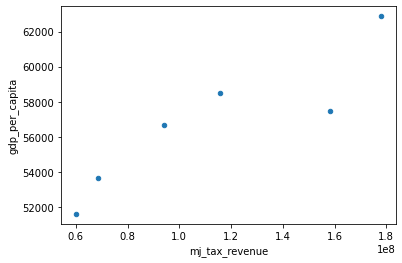

In [39]:
or_plot_df.plot.scatter(y="gdp_per_capita", x="mj_tax_revenue") 

## Checking correlation

In [40]:
import scipy.stats as stats

In [41]:
or_plot_df.corr()

year  gdp_per_capita  mj_tax_revenue
year            1.000000        0.947572        0.985100
gdp_per_capita  0.947572        1.000000        0.902629
mj_tax_revenue  0.985100        0.902629        1.000000

#### 1. r: Pearson’s correlation coefficient
#### 2. p-value: long-tailed p-value

In [42]:
stats.pearsonr(or_plot_df['gdp_per_capita'], or_plot_df['mj_tax_revenue'])

(0.9026290069658307, 0.013760072864958185)

## Differences

In [43]:
diff_df = or_plot_df.diff()
diff_df

year  gdp_per_capita  mj_tax_revenue
0   NaN             NaN             NaN
1   1.0     2054.130778       8491814.0
2   1.0     2989.511553      25580739.0
3   1.0     1834.632234      21688292.0
4   1.0    -1027.423980      42420997.0
5   1.0     5393.418100      19437669.0

In [44]:
diff_df = diff_df.dropna()

<AxesSubplot:xlabel='mj_tax_revenue', ylabel='gdp_per_capita'>

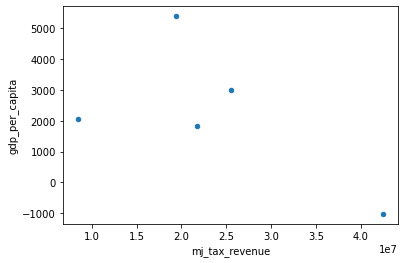

In [45]:
diff_df.plot.scatter(y="gdp_per_capita", x="mj_tax_revenue") 

In [46]:
stats.pearsonr(diff_df['gdp_per_capita'], diff_df['mj_tax_revenue'])

(-0.6103382104122564, 0.27427805731087096)

## Linear Regression

In [47]:
import statsmodels.formula.api as smf

In [48]:
res2 = smf.ols(formula="gdp_per_capita ~ mj_tax_revenue", data=or_plot_df).fit() 
res2.summary()

/Users/jonathanho/opt/anaconda3/envs/VirtEnv/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         gdp_per_capita   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     17.59
Date:                Wed, 06 Jul 2022   Prob (F-statistic):             0.0138
Time:                        15:26:19   Log-Likelihood:                -52.548
No. Observations:                   6   AIC:                             109.1
Df Residuals:                       4   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.846e+04   2132.757     22.721      0.000    4.25e+04    5.44e+04
mj_tax_revenue  7.415e-05   1.77e-05      4.194      0.014    2.51e-05       0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.554
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.774
Skew:                          -0.719   Prob(JB):                        0.679
Kurtosis:                       1.986   Cond. No.                     3.34e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Difference Linear Regression

In [49]:
res = smf.ols(formula="gdp_per_capita ~ mj_tax_revenue", data=diff_df).fit() 
res.summary()

/Users/jonathanho/opt/anaconda3/envs/VirtEnv/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         gdp_per_capita   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1.781
Date:                Wed, 06 Jul 2022   Prob (F-statistic):              0.274
Time:                        15:26:19   Log-Likelihood:                -44.101
No. Observations:                   5   AIC:                             92.20
Df Residuals:                       3   BIC:                             91.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4942.6442   2229.093      2.217      0.113   -2151.324     1.2e+04
mj_tax_revenue    -0.0001   8.58e-05     -1.335      0.274      -0.000       0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.902
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.491
Skew:                           0.521   Prob(JB):                        0.782
Kurtosis:                       1.872   Cond. No.                     6.12e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Not used data

In [50]:
#df_taxes_months = df_taxes_months.drop("month", axis=1)
#df_taxes_months

In [51]:
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
#names = df_taxes_months.columns
#d = scaler.fit_transform(df_taxes_months)
#scaled_df = pd.DataFrame(d, columns=names)
#scaled_df